In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
import random

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto import plotting

In [2]:
def get_grid(n_node):

    x = np.linspace(0, 1, n_node)

    points = []
    for i in range(n_node):
        for j in range(n_node):
            points.append([x[j], x[i]])

    tri = Delaunay(points)

    edge_list = []
    for t in tri.simplices:
        edge_list.append([t[0], t[1]])
        edge_list.append([t[0], t[2]])
        edge_list.append([t[1], t[2]])

    graph = nx.Graph()
    graph.add_nodes_from(np.arange(len(points)))
    graph.add_edges_from(edge_list)
    return graph, points

{(0, 1): Text(0.125, 0.0, '0'),
 (0, 5): Text(0.0, 0.125, '1'),
 (1, 5): Text(0.125, 0.125, '2'),
 (1, 6): Text(0.25, 0.125, '3'),
 (1, 7): Text(0.375, 0.125, '4'),
 (1, 2): Text(0.375, 0.0, '5'),
 (2, 7): Text(0.5, 0.125, '6'),
 (2, 3): Text(0.625, 0.0, '7'),
 (3, 9): Text(0.875, 0.125, '8'),
 (3, 4): Text(0.875, 0.0, '9'),
 (3, 8): Text(0.75, 0.125, '10'),
 (3, 7): Text(0.625, 0.125, '11'),
 (4, 9): Text(1.0, 0.125, '12'),
 (5, 6): Text(0.125, 0.25, '13'),
 (5, 11): Text(0.125, 0.375, '14'),
 (5, 10): Text(0.0, 0.375, '15'),
 (6, 11): Text(0.25, 0.375, '16'),
 (6, 7): Text(0.375, 0.25, '17'),
 (7, 11): Text(0.375, 0.375, '18'),
 (7, 12): Text(0.5, 0.375, '19'),
 (7, 8): Text(0.625, 0.25, '20'),
 (7, 13): Text(0.625, 0.375, '21'),
 (8, 9): Text(0.875, 0.25, '22'),
 (8, 13): Text(0.75, 0.375, '23'),
 (9, 13): Text(0.875, 0.375, '24'),
 (9, 14): Text(1.0, 0.375, '25'),
 (10, 11): Text(0.125, 0.5, '26'),
 (10, 15): Text(0.0, 0.625, '27'),
 (11, 15): Text(0.125, 0.625, '28'),
 (11, 16): T

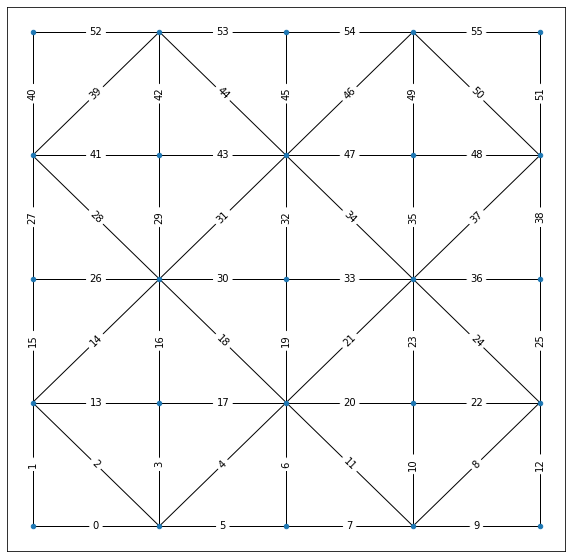

In [3]:
graph, points = get_grid(5)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=20)
nx.draw_networkx_edges(graph, pos=points)

labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))
nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)



We created 0 faces
Order parameter: [0.96428571 0.96428571 0.96428571 0.96428571 0.96428571 0.96428519
 0.95812228 0.95567404 0.95547473 0.95541512 0.95538272 0.9553648
 0.95535519 0.95535014 0.95534751 0.95534616 0.95534546 0.9553451
 0.95534492 0.95534482 0.95534477 0.95534475 0.95534473 0.95534473
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.955

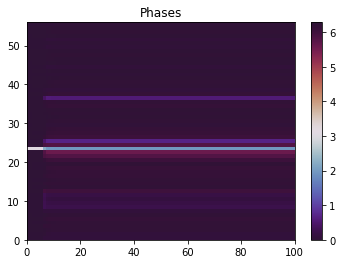

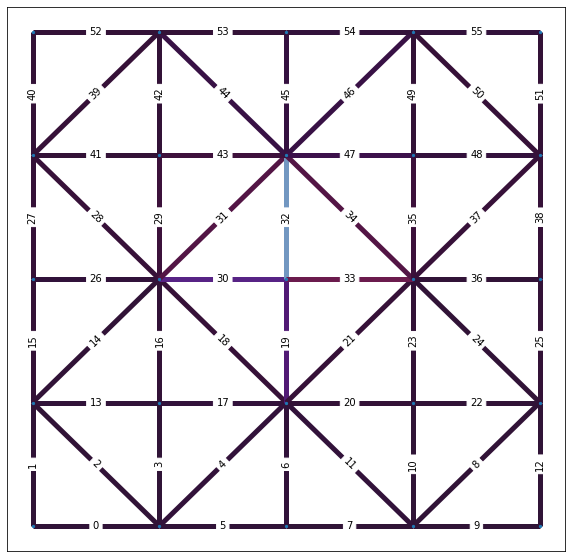

In [4]:

initial_phase = np.random.uniform(0, 2 * np.pi, len(graph.edges))

edge_flip=32
initial_phase = np.zeros(len(graph.edges))
initial_phase[edge_flip] = np.pi

t_max = 100
n_t = 100

complex_delaunay = SimplicialComplex(graph=graph, no_faces=True)

edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)



plotting.plot_edge_kuramoto(edge_result)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=5)
nx.draw_networkx_edges(
        graph,
        pos=points,
        edge_color=edge_result.y[:, -1],
        edge_cmap=plt.get_cmap("twilight_shifted"),
        width=5,
        edge_vmin=np.min(edge_result.y),
        edge_vmax=np.max(edge_result.y),
    )

nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)

op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
print('Order parameter: {}'.format(op))




We created 32 faces
Order parameter: [0.96428571 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571
 0.964169   0.95654899 0.95556351 0.95556791 0.96038641 0.99543067
 0.99901217 0.999688   0.99989869 0.99996686 0.9999891  0.9999964
 0.99999881 0.9999996  0.99999987 0.99999996 0.99999999 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        

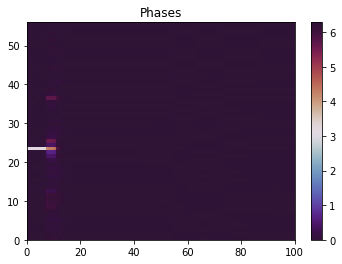

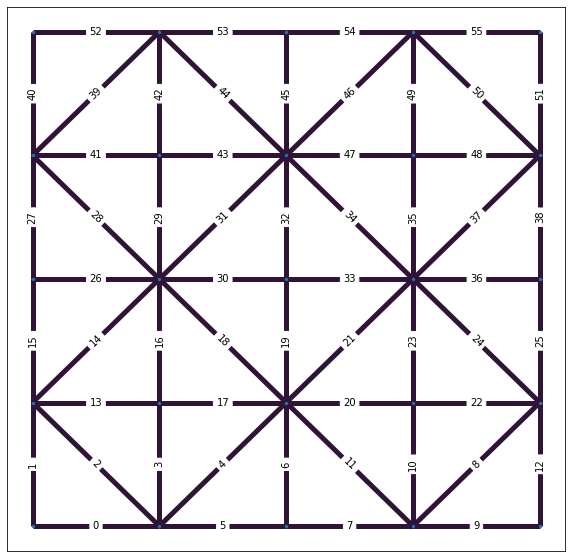

In [5]:


complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)

edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)



plotting.plot_edge_kuramoto(edge_result)


plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=5)
nx.draw_networkx_edges(
        graph,
        pos=points,
        edge_color=edge_result.y[:, -1],
        edge_cmap=plt.get_cmap("twilight_shifted"),
        width=5,
        edge_vmin=np.min(edge_result.y),
        edge_vmax=np.max(edge_result.y),
    )

nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)

op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
print('Order parameter: {}'.format(op[-1]))


In [13]:
edge_flip=32
initial_phase = np.zeros(len(graph.edges))
initial_phase[edge_flip] = np.pi


all_cliques = nx.enumerate_all_cliques(graph)
faces = [clique for clique in all_cliques if len(clique) == 3]

order = []
n_repeats = 10
for i in np.linspace(0, 30,11):
    mean_order = []
    for k in range(0,n_repeats):
        rand_faces = random.sample(faces, int(i))
        complex_delaunay = SimplicialComplex(graph=graph, no_faces=False, faces=rand_faces)
        edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)
        
        op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)        
        mean_order.append(op[-1])
        
    order.append(np.mean(mean_order))





We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 6 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 9 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 12 faces
We created 15 faces
We created 15 faces


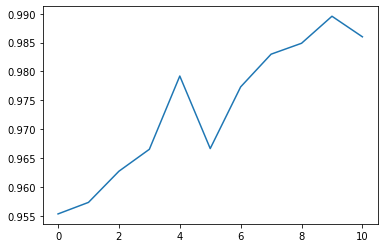

In [14]:
plt.plot(order)